# Question 1

First we create and plot the data.

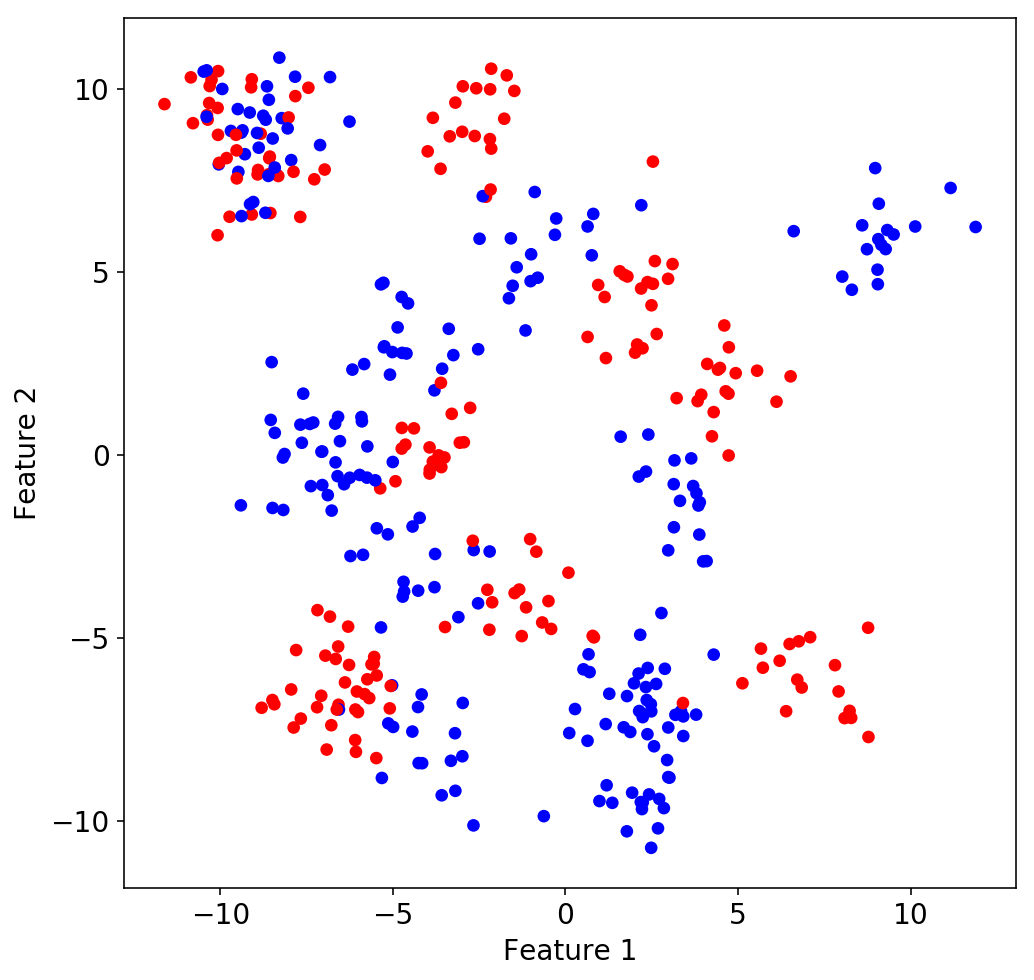

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

Then, we split the data into a training and a test sample. We chose that the training sample should contain half the data. We then evaluate the performance on both samples using the nearest neighbour classifier with k=3.

In [2]:
np.random.seed(123)
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
k = 3 # Number of neighbours
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
train_scores = clf.score(X_train, y_train)
test_scores = clf.score(X_test, y_test)
print("The performances are : \nTraining = {:.3f}".format(train_scores))
print("Testing = {:.3f}".format(test_scores))


The performances are : 
Training = 0.910
Testing = 0.865


/home/lino/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


We want to test the performances for different splitting of the data.

/home/lino/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


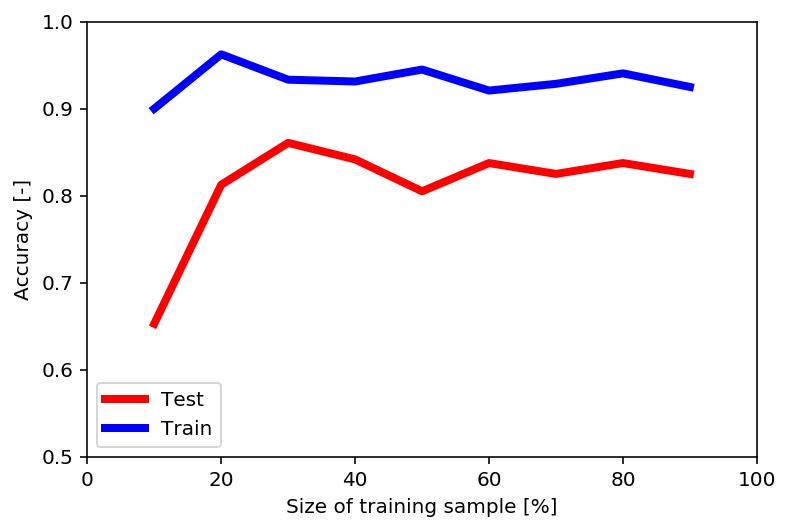

In [3]:
train_scores = []
test_scores = []
np.random.seed(123)
#k = 3 # Number of neighbours
#clf = KNeighborsClassifier(n_neighbors=k)

for split in range(10,100,10):
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=split/100.0)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))
    
plt.plot(range(10,100,10), test_scores, label='Test', c='r', lw=4)
plt.plot(range(10,100,10), train_scores, label='Train', c='b', lw=4)
plt.xlabel('Size of training sample [%]')
plt.ylabel('Accuracy [-]')
plt.legend(loc='best')
plt.xlim((0, 100))
plt.ylim((0.5, 1.));

It seems as if there is a local maximum for the test sample's accuracy. We notice however, that the maximum value of the accuracy in one sample is not at the same position for the other sample.
Now we are interested in the accuracy of the classifier as a function of the number of neighbours.

/home/lino/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Maximum accuracy on the test sample : 0.861
Corresponding number of neighbours : 3.000


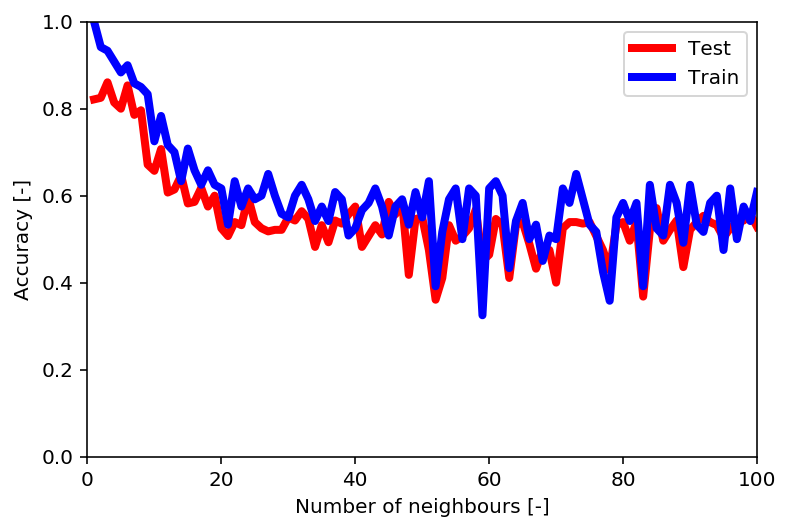

In [4]:
np.random.seed(123)
train_scores = []
test_scores = []
neighbours = range(1,101)

for neighbour in neighbours:
    clf = KNeighborsClassifier(n_neighbors=neighbour)
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.3)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))

print("Maximum accuracy on the test sample : {:.3f}".format(np.max(test_scores)))
print("Corresponding number of neighbours : {:.3f}".format(np.argmax(test_scores) + 1))    
    
plt.plot(neighbours, test_scores, label='Test', c='r', lw=4)
plt.plot(neighbours, train_scores, label='Train', c='b', lw=4)
plt.xlabel('Number of neighbours [-]')
plt.ylabel('Accuracy [-]')
plt.legend(loc='best')
plt.xlim((0, 100))
plt.ylim((0., 1.));

The overall trend is similar for both testing and training samples. It drops at first and then converges, in average, to ~ 0.55. The maximum accuracy on the test sample is 86.1 % and corresponds to 3 neighbours.
The more neighbours there are the less complicated is the classifier.

# Question 2

First we plot the data

/home/lino/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


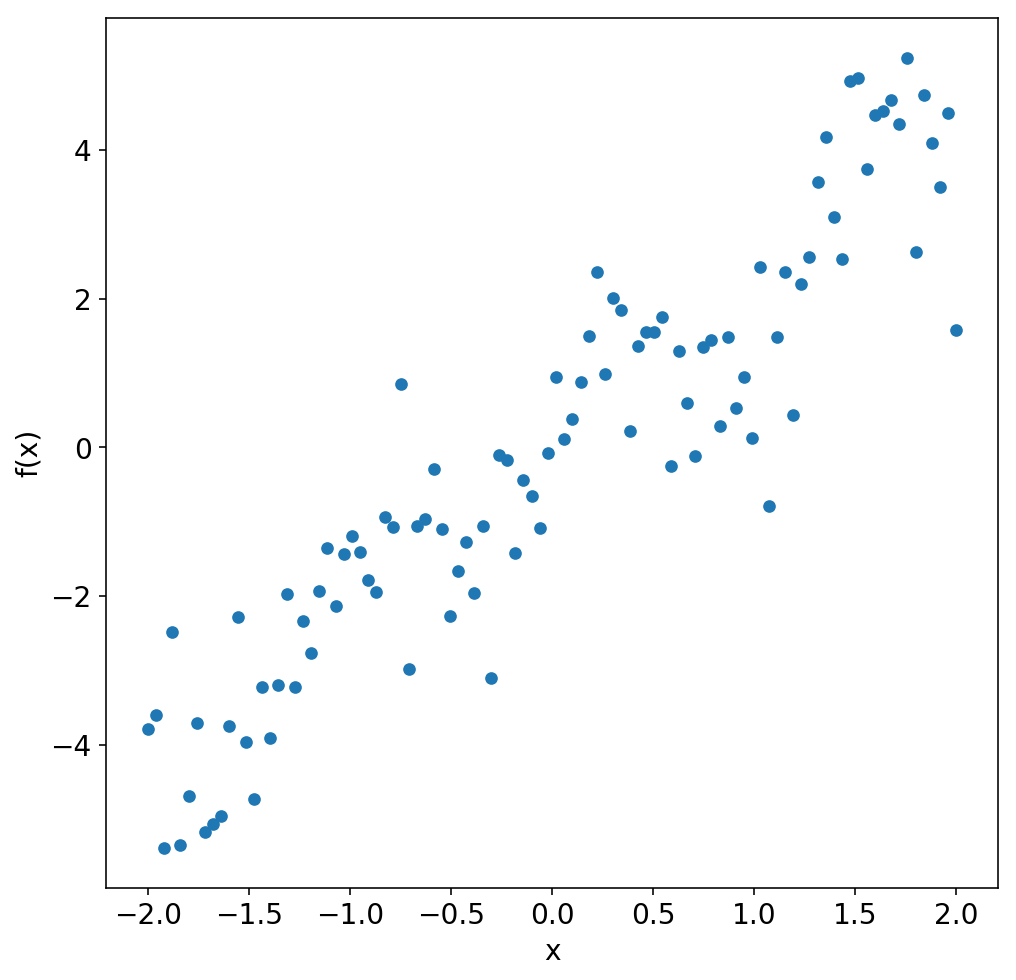

In [5]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

X, y = make_regression()
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)

plt.scatter(X, y, lw=0, s=40)
plt.xlabel("x")
plt.ylabel("f(x)");

Then we compute the RMS on both training and testing samples as a function of the number of neighbours. The performances disagree between both samples for extremal (i.e. not intermediary) values of $n_{neighbours}$. This is most likely due to the fact that for these extremal values we are either over-fitting, for low $n_{neighbours}$, or under-fitting the training sample for high $n_{neighbours}$, respectively. 

Minimum RMS on the test sample : 0.825
Corresponding number of neighbours : 8


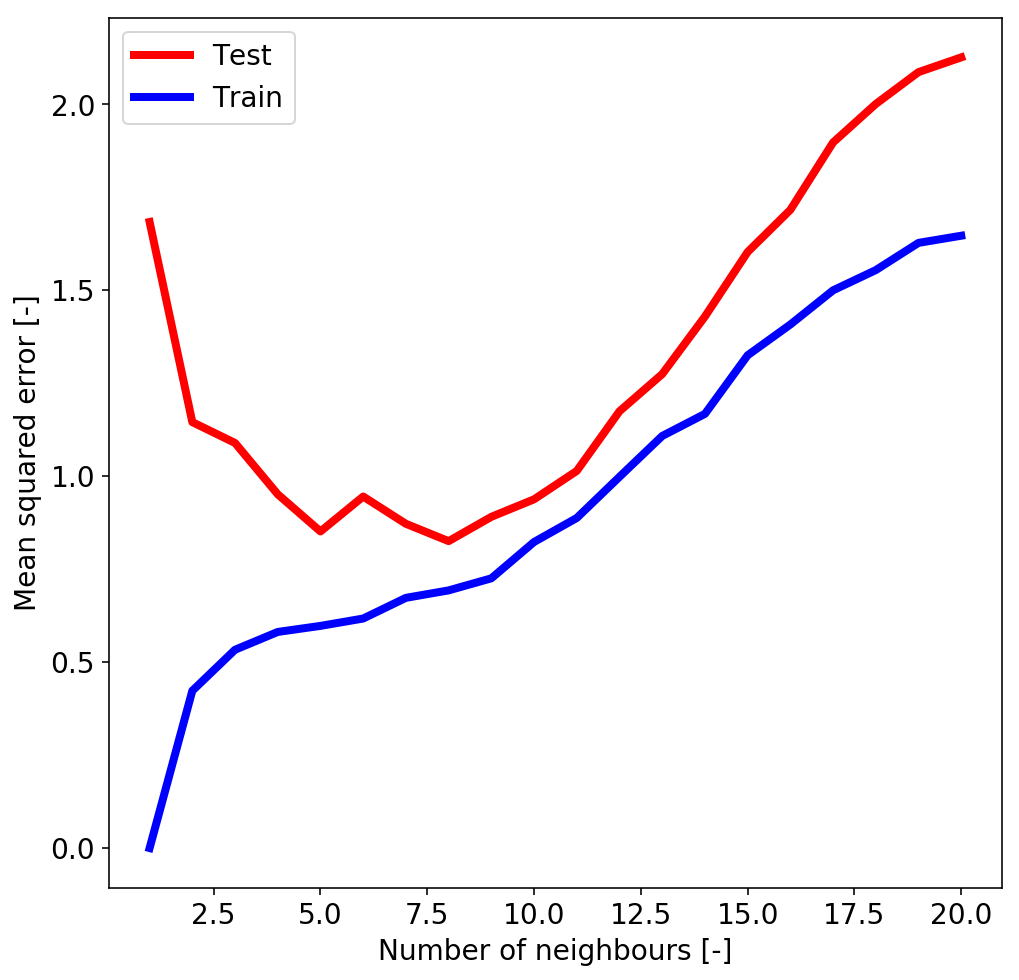

In [6]:
train_scores = []
test_scores = []

line = np.linspace(-2, 2, 100).reshape(-1, 1)

for n in range(1,21):
    #rgr = LinearRegression()
    #rgr.fit(X, y)
    #plt.plot(line, rgr.predict(line), '-r', alpha=0.2, label='linear model', lw=3)

    rgr = KNeighborsRegressor(n_neighbors=n)
    rgr.fit(X_train, y_train)
    #plt.plot(line, rgr.predict(line), '-b', alpha=0.2, label='kNN', lw=3)
    train_scores.append(mean_squared_error(y_train, rgr.predict(X_train)))
    test_scores.append(mean_squared_error(y_test, rgr.predict(X_test)))
    #print("Testing = {:.3f}".format(test_scores[n-1]))
    #break   
    
#print("The mean squared error are : \nTraining = {:.3f}".format(train_scores[n-1]))
#print("Testing = {:.3f}".format(test_scores[n-1]))

plt.plot(range(1,21), test_scores, label='Test', c='r', lw=4)
plt.plot(range(1,21), train_scores, label='Train', c='b', lw=4)
plt.xlabel('Number of neighbours [-]')
plt.ylabel('Mean squared error [-]')
plt.legend(loc='best')
#plt.xlim((0, 100))
#plt.ylim((0., 1.));

print("Minimum RMS on the test sample : {:.3f}".format(np.min(test_scores)))
print("Corresponding number of neighbours : {:.0f}".format(np.argmin(test_scores) + 1)) 

The best setting is $n_{neighbours} = 8$ since it corresponds to the lowest RMS on the testing sample and is fairly similar to the training sample. The RMS plateaus between $ \sim n_{neighbours} = 5$ to 15 because we are close to the optimal settings and thus the estimator is robust.

# Question 3

/home/lino/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


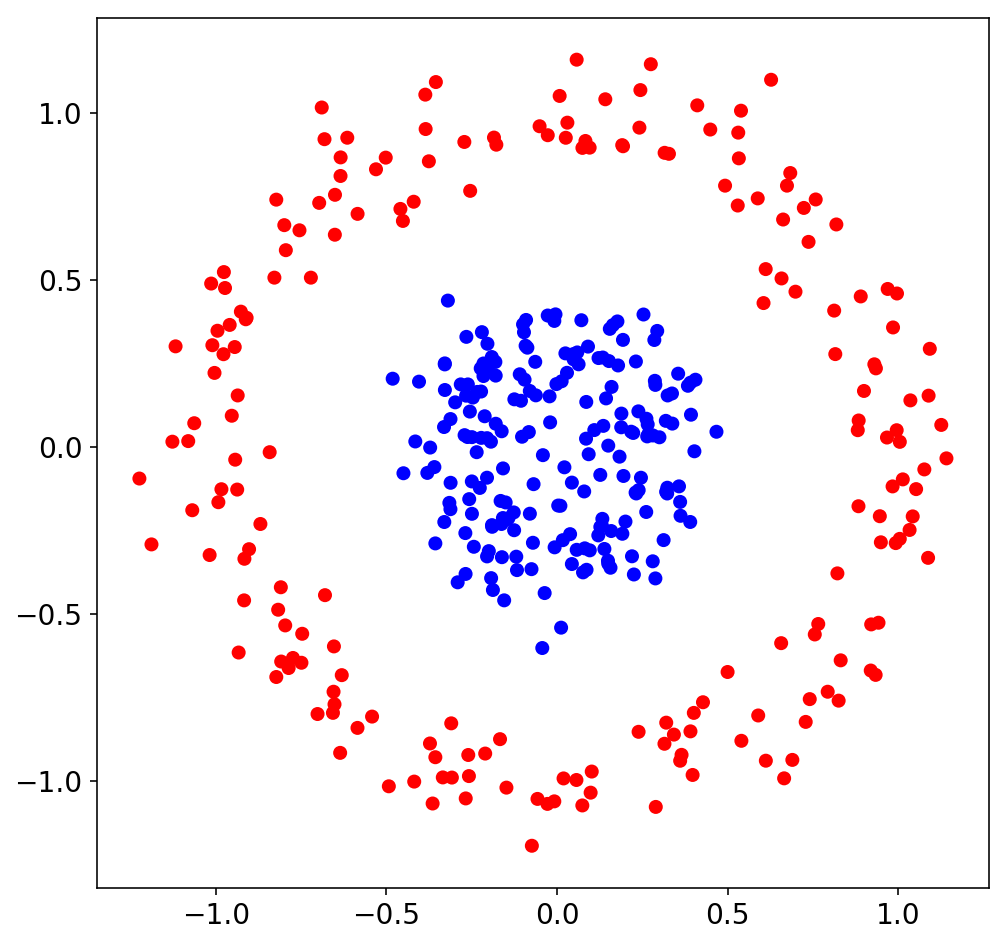

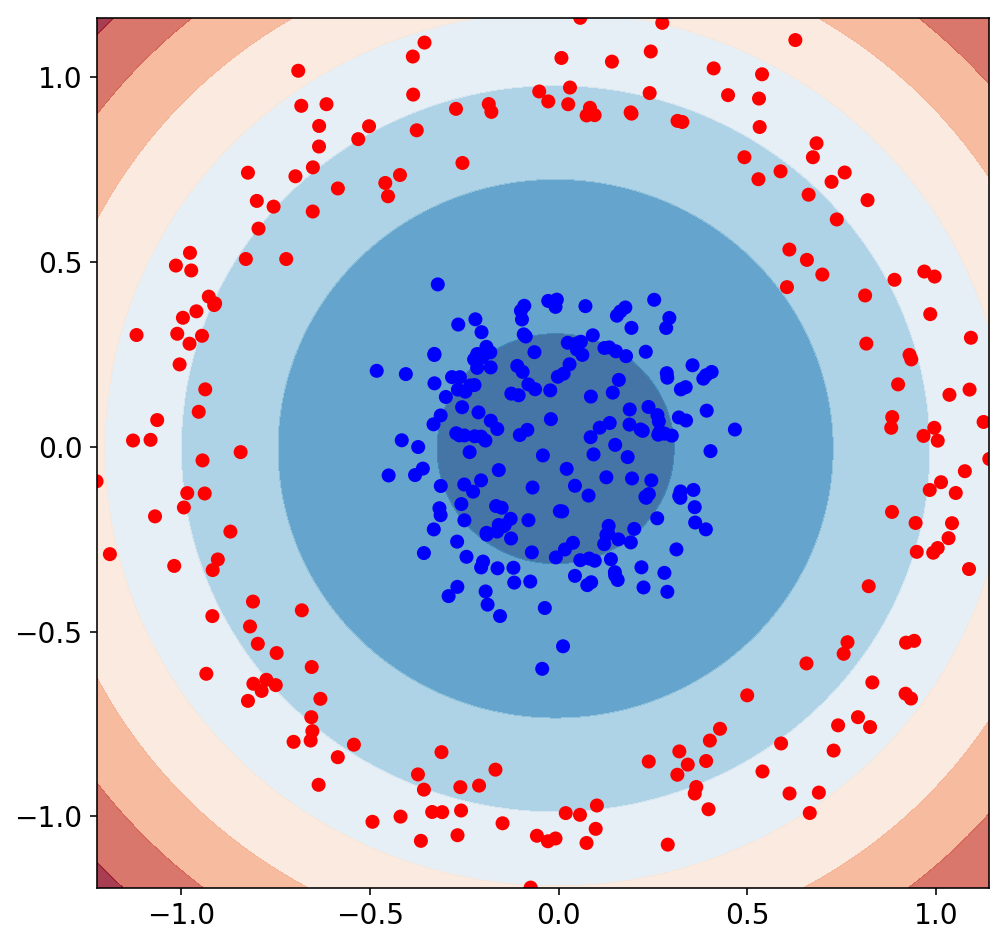

In [7]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression


from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

train_scores = []
test_scores = []

rgr = LogisticRegression()
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)

from utils import plot_surface

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, interaction_only = False)
pipeline = Pipeline([("polynomial_features",poly), ("logistic_regression",rgr)])
pipeline.fit(X_train,y_train)

plot_surface(pipeline, X, y)